
# Project: Investigate a Dataset No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information From 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [43]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling


In [44]:
# Load data
df = pd.read_csv('patient-appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Exploring Data

In [45]:
# check the length and number of column of data
df.shape

(110527, 14)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [47]:
# check duplicated rows
df.duplicated().sum()

0

In [48]:
# check NA on each column
df.isna().any(axis=1).sum()

0

In [49]:
# check if the gender column is clean or no
df.Gender.unique()

array(['F', 'M'], dtype=object)

In [50]:
# Check the duplicated appointment (is there two different appointment with same id or not)
df.AppointmentID.duplicated().sum()

0

#### Data Cleaning

> unified the columns names, remove (-), lowercase lettwers and remove the unnecessary columns.

In [51]:
# rename the columns name, replace - with _ and lowecase
df.rename(columns=lambda x: x.strip().lower().replace('-', "_"), inplace=True)
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

In [52]:
# remove unnecessary columns
df.drop(columns={'appointmentid'}, inplace=True)

In [53]:
# rename incorrect speling
df.rename(columns={'scheduledday':'scheduled_day','appointmentday':'appointment_day','handcap':'handicap','hipertension':'hypertension'},inplace=True)

#### Data Cleaning (Cleaning the age column)
##### Age column contains data 0, -1 data .. as ages shouldn't be -1 so will remove data with age -1, but for the ages 0's we can consider it ages for the babies under 1 year.

In [54]:
# check the age column
df.age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [55]:
# removeing the data with age -1
wrong_age = df.query('age==-1').index  # finding the index of age -1

df.drop(wrong_age, inplace=True)  # removeing rows based on index

In [56]:
len(df) # to check and ensure the data is removed

110526

<a id='eda'></a>
## Exploratory Data Analysis

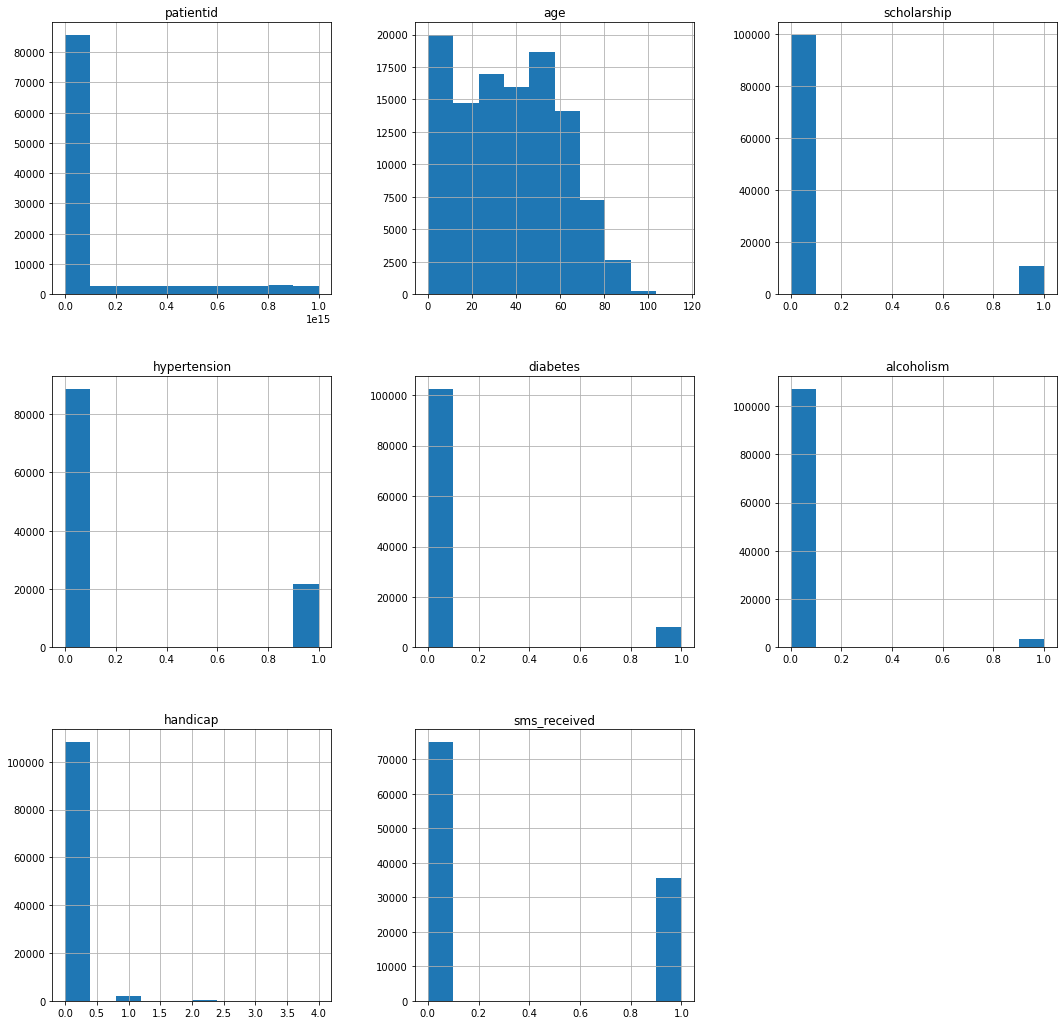

In [57]:
df.hist(figsize=(18,18));

#### From the previous histogram we found
- The patients in ages 0-10 years the most count number, and on the second the ages above 45 to 60. 
- Hypertension patients have the highest count of disease
- Diabetes patients comes on the second level of count disease
- Handicap patients have the lowest count of disease

Text(0.5, 1.0, 'Distribution of Male and Female in Dataset')

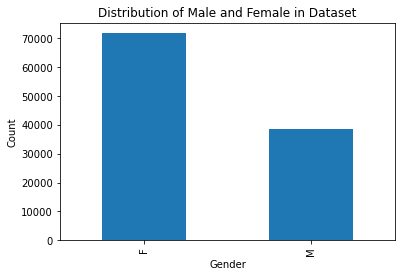

In [59]:
count_gender=df.groupby(['gender']).count()['patientid']
count_gender.plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.title('Distribution of Male and Female in Dataset')

##### From the previous chart we notice that, number of female is aroud 2X of male on dataset

#### Question#1: The relationship between patients' ages and their commitment to attending appointments

First of all devide the patient to the stages based on the age:
- 1-12 year child group
- 13-19 year teen group
- 20-39 year adult group
- 40-59 year mid age group
- 60-80 year sinior group
- 81-115 year latw age group

In [62]:
bin_edge = [-1, 12, 19, 39, 59, 80, 115]
lable_edge = ['child', 'teen', 'adult', 'mid_age', 'sinior_age', 'late_age']
df['age_stages'] = pd.cut(df['age'], bin_edge, labels=lable_edge)
df.head()

,patientid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_stages
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,sinior_age
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,mid_age
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,sinior_age
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,child
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,mid_age


##### And then, visualize the relationship between each age stage and if they commitment or not to show the affect of the age with the appointment commitment

Text(0, 0.5, 'Proportion')

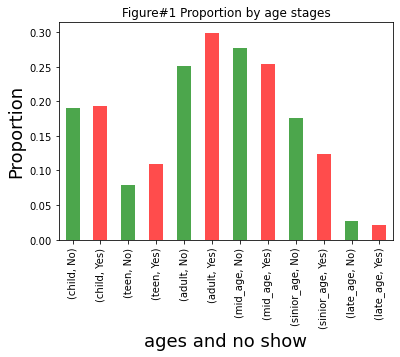

In [63]:

colors = ['green','red']
counts = df.groupby(['age_stages', 'no_show']).count()['patientid']
totals = df.groupby('no_show').count()['patientid']
# for more accurate information i used the proportions rather than count
proportions = counts / totals
proportions.plot(
    kind='bar', title='Figure#1 Proportion by age stages', color=colors, alpha=.7);
plt.xlabel('ages and no show', fontsize=18)
plt.ylabel('Proportion', fontsize=18)


- The result says the patients with late age "81-115" years are the lowest group take appointments to the clinic.
- Mid age "40-56" years are the most group take appointemnt to the clinic. 
- Sinior age "59-80" years are the group whos on attends patient is more than whos no show to their appointment. so the patient withen this age are more commitments.
- Teen and adult group age they no show to their appointment more than proportion of whos attend the appointments.

##### *Here i would like to know, which gender is more commitment with appointments

Text(0, 0.5, 'Proportion')

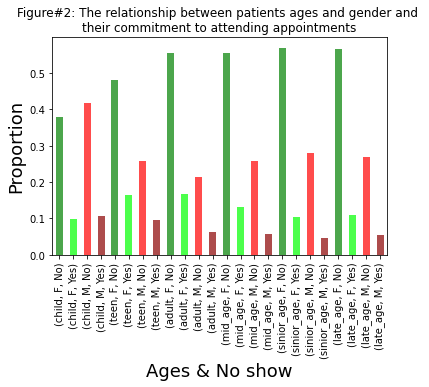

In [65]:
colors = ['green', 'lime', 'red', 'darkred']
total_age_stage = df.groupby('age_stages')['patientid'].count()

counts = df.groupby(['age_stages', 'gender', 'no_show']).count()['patientid']
#print('counts result categories', counts/total_age_stage)
proportions = counts/total_age_stage
proportions.plot(kind='bar', color=colors,
                 title='Figure#2: The relationship between patients ages and gender and \ntheir commitment to attending appointments', alpha=.7);

plt.xlabel('Ages & No show', fontsize=18)
plt.ylabel('Proportion', fontsize=18)


In this image i devide the proportion of attending appointments for each age stage and each group devide by gender also. and the result:

- For all age groups it's appear the female group is higher than the male on attending appointments (no_show -> No, gender-> F).
- For the group satge child "1-12", I think we not concider to the gender, because they always will came with them parents, and as we see the different between no_show (yes/no) is not hight beween male and female.
- For mid age, sinior age, and late age group the proportion of whos attend to their appointment is twise the proportion of male.

### Research Question 2: Is the SMS reminder affected the commitment of the patient to their appointments? 

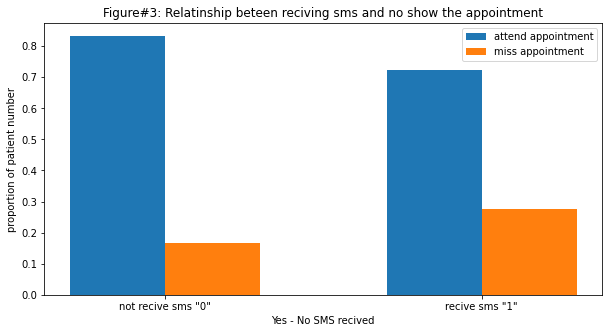

In [66]:
# Numbers of pairs of bars you want
N = 2

total = df.groupby('sms_received').count()['patientid']

# count number of patient they attending to their appintment ether recive sms or no
affect_no_sms = df[df['no_show'] == "No"].groupby('sms_received').count()['patientid'] 

# count number of patient they ignore their appintment ether recive sms or no
affect_yes_sms = df[df['no_show'] == "Yes"].groupby(
    'sms_received').count()['patientid']  


# Specify the values of blue bars (height)
blue_bar = affect_no_sms/total # no-show = No
# Specify the values of orange bars (height)
orange_bar = affect_yes_sms/total # # no-show=Yes

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10, 5))

# Width of a bar
width = 0.3

# Plotting
plt.bar(ind , blue_bar, width, label="attend appointment")
plt.bar(ind + width, orange_bar, width, label="miss appointment")

plt.xlabel('Yes - No SMS recived')
plt.ylabel('proportion of patient number')
plt.title('Figure#3: Relatinship beteen reciving sms and no show the appointment')

# xticks()

plt.xticks(ind + width / 2, ('not recive sms "0"', 'recive sms "1"'))

# Finding the best position for legends and putting it
plt.legend(loc='best')

plt.show()

- As we see, around 72% of patient whos reciving sms they coming to their appointment while patient they didn't recive sms are represent 83% attending apointment.
The percent 72% response for sms is ok, but when 83% coming to their appointment althoug they didn't recive sms that mean sms not very affect.
- 27% of the patient recive sms attend to their appointment. And whos didn't recive sms 17% miss appointment.

The result is it's seems the patients dosn't care about sms and the sms not encorage them engh to attendeing there appointment.
so, the SMS dosn't have good relationship with attending the appointments.
 

### Research Question 3: Is the patients location from the clinic is affected attending to the appointment?

Text(0, 0.5, 'Counts patients')

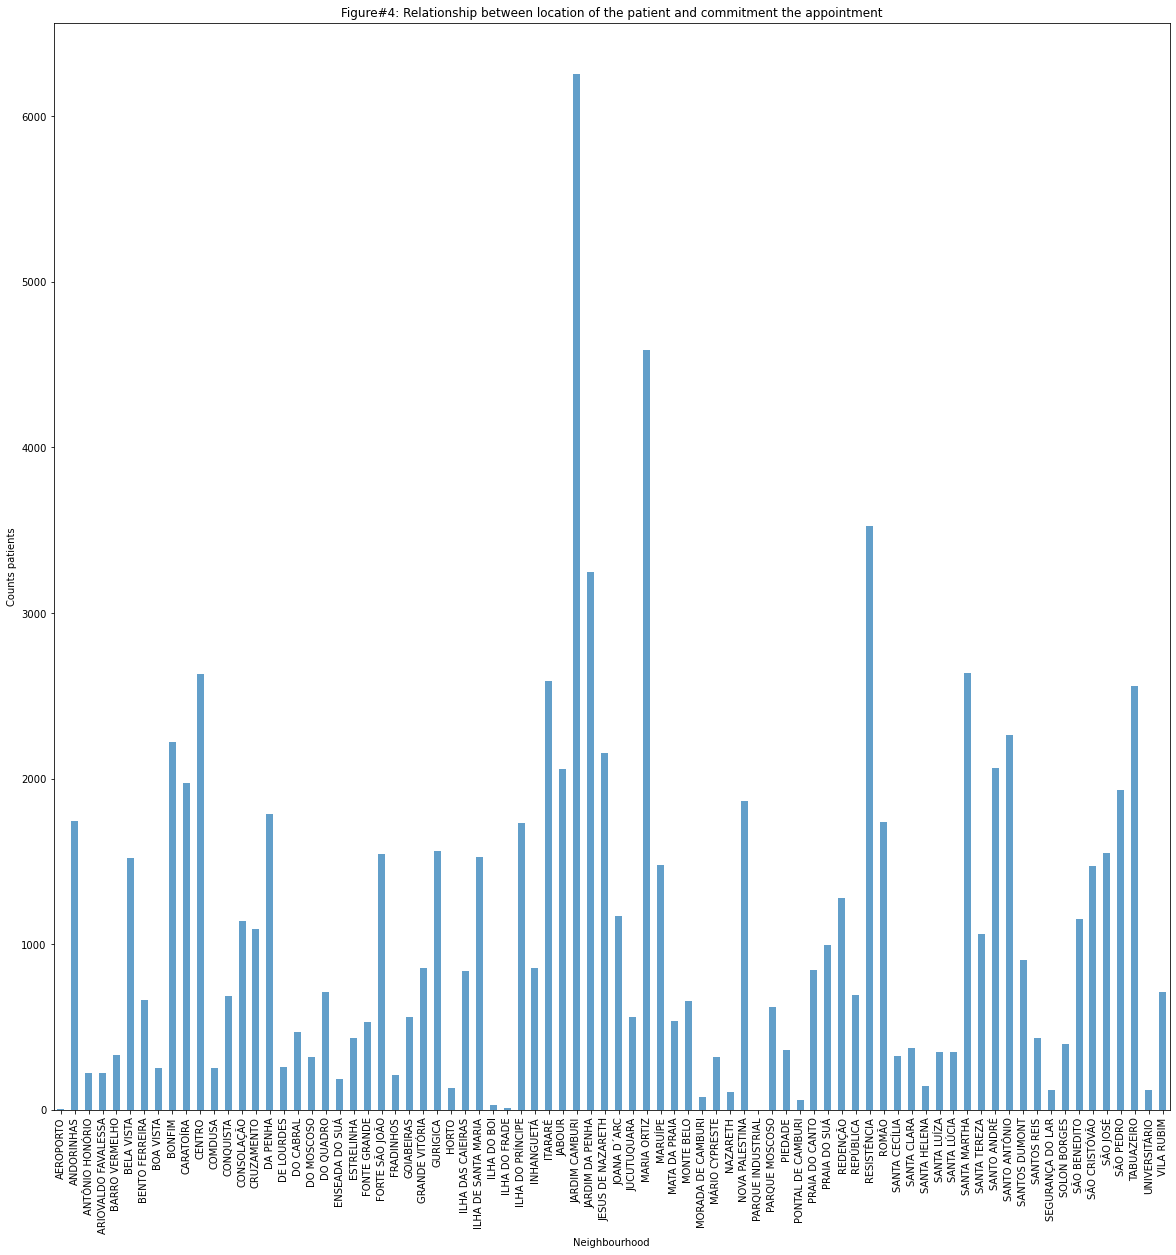

In [67]:
plt.figure(figsize=(20, 20))
# count number of patient they didn't miss them appointments, and where they live
count_loc = df[df["no_show"] == "No"].groupby(
    'neighbourhood').count()['patientid']

count_loc.plot(
    kind='bar', title='Figure#4: Relationship between location of the patient and commitment the appointment', alpha=.7)

plt.xlabel('Neighbourhood')
plt.ylabel('Counts patients')

As shown from the previous image, not all the neighbourhoods attending with same count.. absolutely it is affected by the distance, income or any other multi vactor..


*Here I'll represent the top and lowest 5 Neighbourhood with no show

In [68]:
data_neighbourhood=df.neighbourhood.value_counts()
top_5=data_neighbourhood.sort_values(ascending=False).head()
lowest_5=data_neighbourhood.sort_values(ascending=True).head()
#print(top_5)
print(lowest_5)

PARQUE INDUSTRIAL               1
ILHAS OCEÂNICAS DE TRINDADE     2
AEROPORTO                       8
ILHA DO FRADE                  10
ILHA DO BOI                    35
Name: neighbourhood, dtype: int64


Text(0.5, 1.0, 'Top 5 Neighbourhood attending to the appointments')

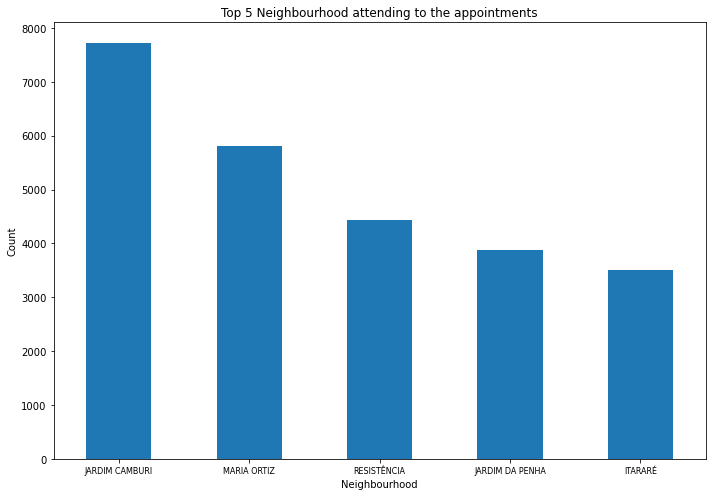

In [85]:
top_5.plot(kind='bar')
plt.xticks(rotation='horizontal',size=8)
plt.xlabel('Neighbourhood')
plt.ylabel('Count');
plt.title('Top 5 Neighbourhood attending to the appointments')


Previous image represents the top 5 of Neighbourhood they attending to their appointments.

Text(0.5, 1.0, 'Lowest 5 Neighbourhood attending to the appointments')

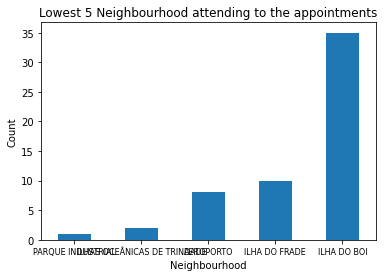

In [69]:
lowest_5.plot(kind='bar')
plt.xticks(rotation='horizontal',size=8)
plt.xlabel('Neighbourhood')
plt.ylabel('Count');
plt.title('Lowest 5 Neighbourhood attending to the appointments')

Previous image represents the lowest 5 of Neighbourhood they attending to their appointments.
where the ILHA DO BOI patients count is 35 patients and only one patient from PARQUE INDUSTRIAL 

### Research Question 4: Is the patients have scholarship commitment to their appointment or no?

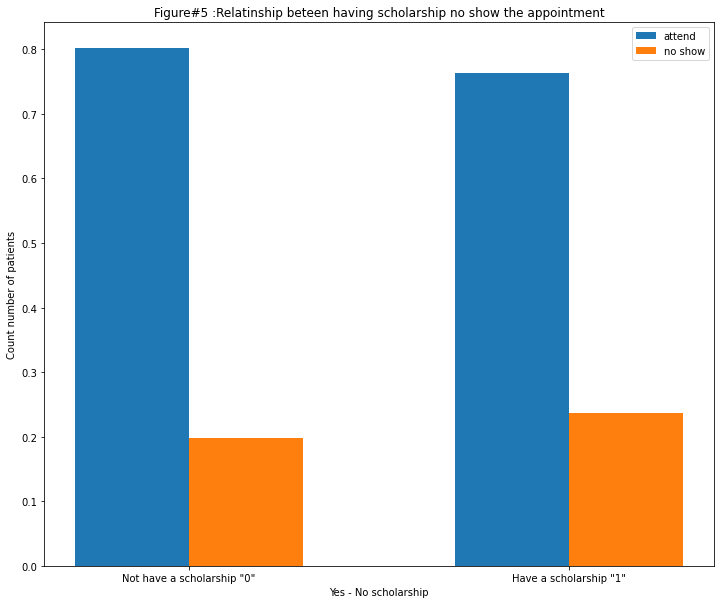

In [72]:
N = 2

total = df.groupby('scholarship').count()['patientid']

affect_no_scholarship = df[df['no_show'] == "No"].groupby('scholarship').count()['patientid']
affect_scholarship = df[df['no_show'] == "Yes"].groupby(
    'scholarship').count()['patientid'] 


blue_bar = affect_no_scholarship/total # no show "attend appitment"
orange_bar = affect_scholarship/total # yes "miss appitment"

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(12, 10))

# Width of a bar
width = 0.3

# Plotting
plt.bar(ind , blue_bar, width, label="attend")
plt.bar(ind + width, orange_bar, width, label='no show')

plt.xlabel('Yes - No scholarship')
plt.ylabel('Count number of patients')
plt.title('Figure#5 :Relatinship beteen having scholarship no show the appointment')


plt.xticks(ind + width / 2, ('Not have a scholarship "0"', 'Have a scholarship "1"'))

# Finding the best position for legends and putting it
plt.legend(loc='best')

plt.show()


- When we talk about the affect of scholership the perecentage of they attending appointments and have scholership is around 74% while who they attended  but didn't  have a scolsership are 80% of total each categories..

so, the scholership didn't encorage patients enugh to attending appointments.
The result there is no realtionship between scooldership and no show appointments.

### Research Question 5: Is the patients have specefic disease are more commitment to their appointment or no?

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   patientid        110526 non-null  float64 
 1   gender           110526 non-null  object  
 2   scheduled_day    110526 non-null  object  
 3   appointment_day  110526 non-null  object  
 4   age              110526 non-null  int64   
 5   neighbourhood    110526 non-null  object  
 6   scholarship      110526 non-null  int64   
 7   hypertension     110526 non-null  int64   
 8   diabetes         110526 non-null  int64   
 9   alcoholism       110526 non-null  int64   
 10  handicap         110526 non-null  int64   
 11  sms_received     110526 non-null  int64   
 12  no_show          110526 non-null  object  
 13  age_stages       110526 non-null  category
dtypes: category(1), float64(1), int64(7), object(5)
memory usage: 11.9+ MB


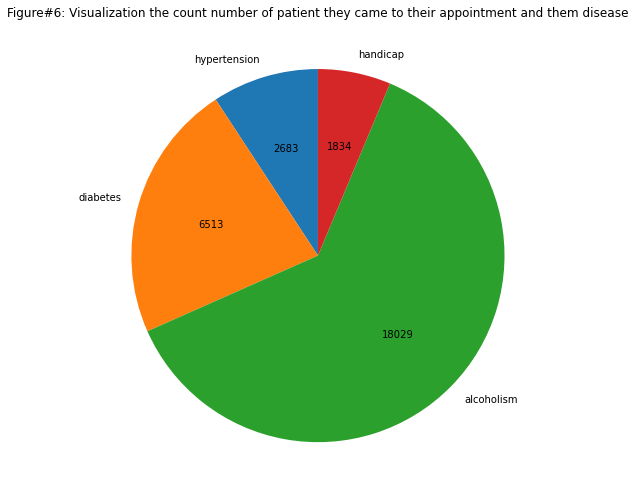

In [75]:
# query for the patients who has a disease and investigate what the most disease they more commitment to the appointment and comparecount_diabetes = df.query('diabetes == 1 & no_show=="No"')['patientid'].count()
count_diabetes = df.query('diabetes == 1 & no_show=="No"')['patientid'].count()

count_handcap = df.query('handicap >= 1 & no_show=="No"')['patientid'].count()
count_alcoholism = df.query('alcoholism >= 1 & no_show=="No"')[
    'patientid'].count()
count_hypertension = df.query('hypertension >= 1 & no_show=="No"')[
    'patientid'].count()

# save the result in a list
dises_llist = []
dises_llist.append(count_alcoholism)
dises_llist.append(count_diabetes)
dises_llist.append(count_hypertension)
dises_llist.append(count_handcap)
dises_llist 

plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams["figure.autolayout"] = True

dises = ['hypertension', 'diabetes', 'alcoholism', 'handicap']

dises_llist
total = sum(dises_llist)
plt.title('Figure#6: Visualization the count number of patient they came to their appointment and them disease')

plt.pie(dises_llist,  labels=dises,
        autopct=lambda p: '{:.0f}'.format(p * total / 100),
        startangle=90)

plt.show()




The result show that the patients whos having alcoholism is the most group commitment with their appointment, and the patients with one or more handicap is the lowest.

### Research Question 6: Is the appointment day weekend or weekday affected patients commitmenst to their appointment or no?

In [80]:
# convert the type of the appointmentday to datetime
df["appointment_day"] = pd.to_datetime(df["appointment_day"])
# create new coumn to find the name of the day from the date
df["DayOfWeek"] = df["appointment_day"].dt.weekday
# check if the day weekend or weekday

# the week is starting from monday 0 to friday 5
df["IsWeekend"] = df["DayOfWeek"] >= 5

In [81]:
# exploring the dayes 
df["DayOfWeek"].unique()
# the result from moday to saturday that mean sunday clinic is off

array([4, 1, 0, 2, 3, 5], dtype=int64)

Text(0, 0.5, 'Count Patient')

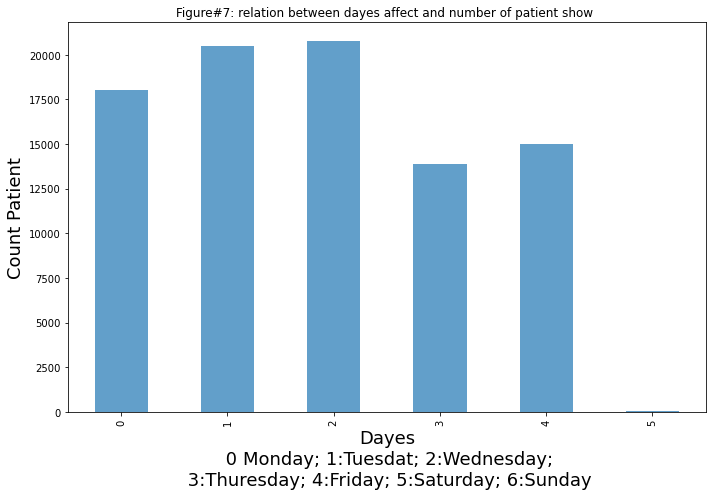

In [82]:
# count the number of patient on each day they didn't miss their appointment
count_dayes = df[df["no_show"] == "No"].groupby('DayOfWeek').count()[
    'patientid']

count_dayes.plot(kind='bar',
                 title='Figure#7: relation between dayes affect and number of patient show ', alpha=.7)
plt.xlabel('Dayes\n 0 Monday; 1:Tuesdat; 2:Wednesday;\n 3:Thuresday; 4:Friday; 5:Saturday; 6:Sunday', fontsize=18)
plt.ylabel('Count Patient', fontsize=18)


From the bar chart we found the on Saturday the less number of patients present to the clinic, so maybe the patient won't prefere to consume the weekend on visiting doctors, and prefere the visiting to be weekday. Wednesday is the most day have patient attending the clinic.